# Logistic Regression
Andrew Ng Machine Learning Coursera ex2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
data = np.loadtxt('/Users/devin/ML/machine-learning-ex2/ex2/ex2data1.txt',delimiter=",")
X = data[:,:2]
y = data[:,2]
m = len(y)
m,n = np.shape(X)

### Part 1: Plotting

In [5]:
def plot_data(X,y,labels=["",""]):  
    pos = np.argwhere(y == 1)[:,0]
    neg = np.argwhere(y == 0)[:,0]
    fig = plt.figure(figsize=(8,8))
    plt.scatter(X[pos][:,0],X[pos][:,1],marker='+',s=100,c='y')
    plt.scatter(X[neg][:,0],X[neg][:,1],marker='o',c='black')
    
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    

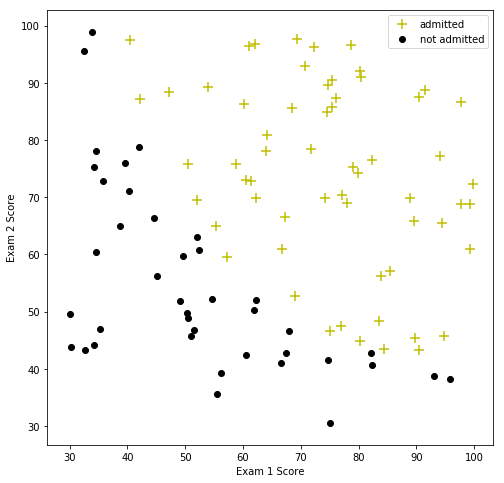

In [6]:
plot_data(X,y,labels=['Exam 1 Score','Exam 2 Score'])
plt.legend(['admitted','not admitted'])

### Part 2: Compute Cost and Gradient

In [7]:
X = np.concatenate((np.ones((m,1)), X),axis=1)
initial_theta = np.zeros(3)

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta.T))
    J = np.sum(np.multiply(-y,np.log(h)) - np.multiply((1-y), np.log(1 - h))) / m
    return J

In [10]:
def grad_function(theta, X, y):
    h = sigmoid(np.dot(X, theta.T))
    grad = (1/m) * np.dot(np.subtract(h,y).T,X)
    return grad

In [11]:
cost = cost_function(initial_theta, X, y)
grad = grad_function(initial_theta, X, y)

In [12]:
print(cost)
print(grad)

0.69314718056
[ -0.1        -12.00921659 -11.26284221]


In [13]:
test_theta = np.array([-24, 0.2, 0.2])

In [14]:
cost = cost_function(test_theta, X, y)
grad = grad_function(test_theta, X, y)

In [15]:
print(cost)
print(grad)

0.218330193827
[ 0.04290299  2.56623412  2.64679737]


### Part 3: Optimizing

In [16]:
import scipy.optimize as opt

In [17]:

options = {'maxiter': 300}

theta  = opt.fmin(lambda t: cost_function(t, X, y), initial_theta,**options)
print(theta)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
[-25.16130062   0.20623142   0.20147143]


In [18]:
theta = opt.fmin_bfgs(f=cost_function, x0=initial_theta, fprime=grad_function, args=(X, y))  
cost_function(result, X, y) 
print(theta)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31


/Users/devin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/devin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


NameError: name 'result' is not defined

In [19]:
res = opt.minimize(cost_function, initial_theta, method='BFGS', jac=grad_function, args= (X,y),
               options={'disp': False})
print(res.x)

[-25.16133284   0.2062317    0.2014716 ]


/Users/devin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/devin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


In [20]:
def plotDecisionBoundary(theta, X, y):
    plot_data(X[:,1:], y)

    if X.shape[1] <= 3:
        plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])
        plot_y = (-1 /theta[2]) * (theta[1] * plot_x + theta[0])
        plt.plot(plot_x,plot_y)

    else:
        u = np.linspace(-1, 1.5, 50);
        v = np.linspace(-1, 1.5, 50);

        z = np.zeros((len(u), len(v)));

        for i in range(1,len(u)):
            for j in range(1,len(v)):
                z[i,j] = np.dot(map_features(u[i], v[j]),theta)
        z = z.T
        
        plt.contour(u,v,z)


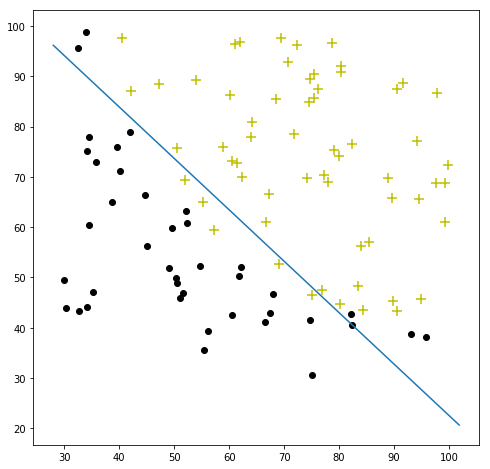

In [21]:
plotDecisionBoundary(theta,X,y)

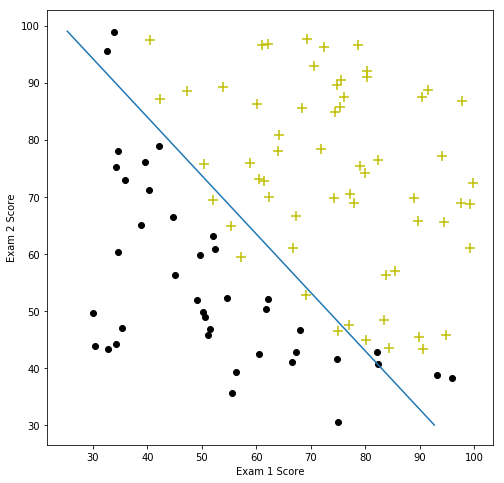

In [22]:
plot_data(X[:,1:],y,labels=['Exam 1 Score','Exam 2 Score'])
plt.plot([(-theta[0] - theta[2]*x2) / theta[1] for x2 in range(30,100)],[x2 for x2 in range(30,100)])

## Regulatization
Andrew Ng Machine Learning Coursera ex2_reg
### Part 1: Regularized Logistic Regression

In [23]:
data = np.loadtxt('/Users/devin/ML/machine-learning-ex2/ex2/ex2data2.txt',delimiter=",")
X = data[:,:2]
y = data[:,2]
m = len(y)

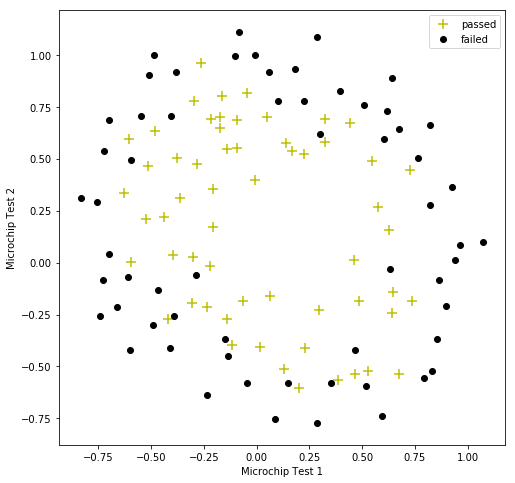

In [24]:
plot_data(X,y, labels = ['Microchip Test 1','Microchip Test 2'])
plt.legend(['passed','failed'])

In [25]:
def map_features(X1,X2):

    degrees = 6
    try:
        mapped = np.ones(X1.shape).reshape((len(X1),1))
    except TypeError:
        mapped = np.ones((1,1))
    for i in range(1,degrees+1):
        for j in range(i+1):
            try:
                mapped = np.hstack((mapped,(((X1**(i-j))*(X2**j)).reshape((len(X1),1)))))
            except TypeError:
                mapped = np.hstack((mapped,(((X1**(i-j))*(X2**j)).reshape((1,1)))))
    return mapped

In [26]:
X = map_features(X[:,0],X[:,1])

In [27]:
X.shape

(118, 28)

In [28]:
initial_theta = np.zeros(28)
lamda = 1

In [29]:
def cost_function_reg(theta, X, y, lamda):
    m = len(y)
    h = sigmoid(X.dot(theta.T))
    J = np.sum(np.multiply(-y,np.log(h)) - np.multiply((1-y), np.log(1 - h))) / m + sum(lamda /(2*m) * theta[1:]**2)
    h = sigmoid(np.dot(X, theta.T))
    grad = (1/m) * np.dot(np.subtract(h,y).T,X)
    grad[1:] = grad[1:] + (lamda / m) * theta[1:]
    return J, grad


In [30]:
cost_function_reg(initial_theta, X, y, lamda)

(0.6931471805599454,
 array([  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
          5.03446395e-02,   1.15013308e-02,   3.76648474e-02,
          1.83559872e-02,   7.32393391e-03,   8.19244468e-03,
          2.34764889e-02,   3.93486234e-02,   2.23923907e-03,
          1.28600503e-02,   3.09593720e-03,   3.93028171e-02,
          1.99707467e-02,   4.32983232e-03,   3.38643902e-03,
          5.83822078e-03,   4.47629067e-03,   3.10079849e-02,
          3.10312442e-02,   1.09740238e-03,   6.31570797e-03,
          4.08503006e-04,   7.26504316e-03,   1.37646175e-03,
          3.87936363e-02]))

In [577]:
def grad_function_reg(theta, X, y, lamda):
    
    return grad

In [578]:
grad_function_reg(initial_theta, X, y, lamda)[:5]

array([  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
         5.03446395e-02,   1.15013308e-02])

In [31]:
test_theta = np.ones(28)
lamda = 10

In [32]:
cost_function_reg(test_theta, X, y, lamda)

(3.164509331615009,
 array([ 0.34604507,  0.16135192,  0.19479576,  0.22686278,  0.09218568,
         0.24438558,  0.14339212,  0.10844171,  0.10231439,  0.18346846,
         0.17353003,  0.08725552,  0.11822776,  0.0858433 ,  0.19994895,
         0.13522653,  0.09497527,  0.09356441,  0.09979784,  0.09140157,
         0.17485242,  0.14955442,  0.08678566,  0.09897686,  0.08531951,
         0.10190666,  0.08450198,  0.18228323]))

In [581]:
grad_function_reg(test_theta, X, y, lamda)[:5]

array([ 0.34604507,  0.16135192,  0.19479576,  0.22686278,  0.09218568])

In [39]:
import scipy.optimize as opt
lamda = 1
options = {'maxiter': 400, 'disp':True}
theta  = opt.minimize(cost_function_reg, initial_theta, args= (X,y,lamda), method='BFGS', jac=True, options=options)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48


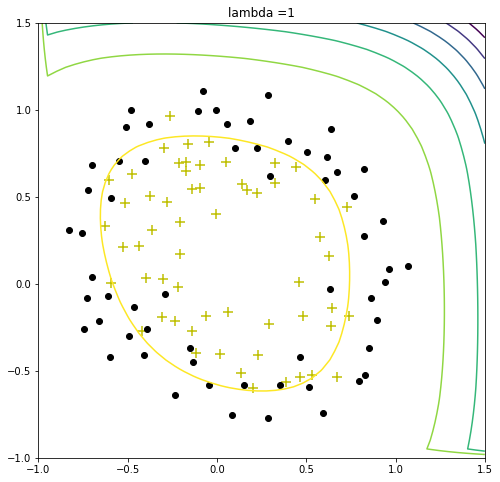

In [41]:
plotDecisionBoundary(theta.x, X, y)
plt.title('lambda ={}'.format(lamda))